# Phase 2: Feature Engineering
## Introduce new features that are relevant to the problem and dataset.

During the exploratory data analysis (EDA) phase, we thoroughly examined the dataset and made several observations. First, we found that there are no missing values or outliers present in the dataset, ensuring data completeness and quality. However, during the analysis, we noticed that only two columns, "Discount_offered" and "Weight_in_gms," exhibited a moderate correlation with the target variable "Reached.on.Time_Y.N."

As this correlation may not be sufficient to perform reliable modeling or draw meaningful conclusions, we recognized the need to introduce new features that could potentially reveal hidden insights and improve the predictive power of our models. In light of this, we have identified nearly 20 new features that we believe are relevant and beneficial for the dataset.

The introduction of these new features aims to uncover data patterns, enhance the dataset's information, and potentially improve the performance of any analytical or predictive operations we undertake. By incorporating these additional features, we hope to gain a deeper understanding of the data and extract valuable insights that were not apparent in the original feature set.

Later in the process, after introducing the new features, our next step will be to select only the most important columns based on the correlation between the new features and the target variable, "Reached.on.Time_Y.N."


### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import os
# !pip install sklearn

In [2]:
current_dir = os.getcwd()
#defining current directory so that any developer can run the full notebook with any File not found error
dataset_dir = os.path.join(current_dir, '..', '..', 'Dataset')
file_path = os.path.join(dataset_dir, 'stride.csv')
Stridedf = pd.read_csv(file_path)
df=Stridedf.copy()
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


### Feature 1 : Mode_of_Shipment

The "Mode_of_Shipment_encoded" feature represents the encoded values of the "Mode_of_Shipment" column. The original values, Ship, Flight, and Road, are mapped to 1, 2, and 3, respectively.

In [3]:
# Encoding the "Mode_of_Shipment" column to make it more clearn in dataframe
mode_mapping = {'Ship': 1, 'Flight': 2, 'Road': 3}
df['Mode_of_Shipment_encoded'] = df['Mode_of_Shipment'].map(mode_mapping)

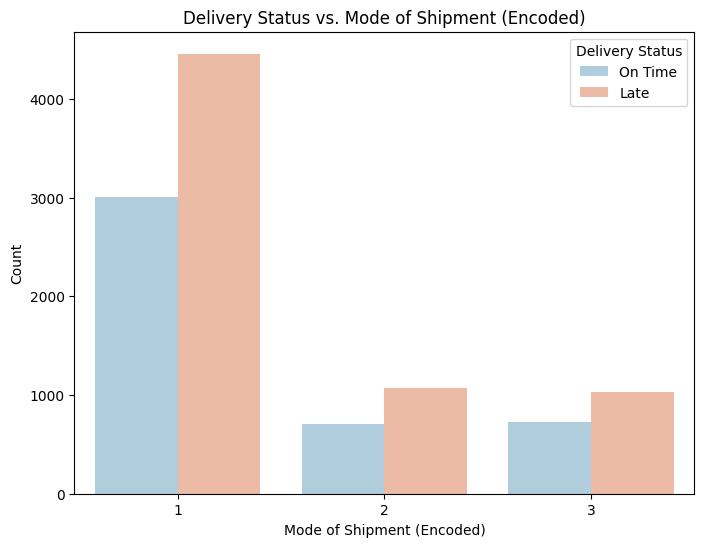

In [4]:
#ploting the graph
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Mode_of_Shipment_encoded', hue='Reached.on.Time_Y.N',  palette="RdBu_r")
plt.xlabel('Mode of Shipment (Encoded)')
plt.ylabel('Count')
plt.title('Delivery Status vs. Mode of Shipment (Encoded)')
plt.legend(title='Delivery Status', labels=['On Time', 'Late'])

### Feature 2 : Customer Rating Features

The "Customer_rating_category" feature categorizes customer ratings into 'VeryLow', 'Low', 'Average','Standard' and 'High', making it easier to analyze the impact of customer ratings on delivery status.

In [5]:
rating_mapping = {1: 'VeryLow', 2: 'Low', 3: 'Average', 4: 'Standard', 5: 'High'}
df['Customer_rating_category'] = df['Customer_rating'].map(lambda x: rating_mapping[x])

# Convert the 'Customer_rating_category' column to categorical data type eg. veryLow, Low etc.
df['Customer_rating_category'] = pd.Categorical(df['Customer_rating_category'], categories=['VeryLow', 'Low', 'Average','Standard', 'High'], ordered=True)

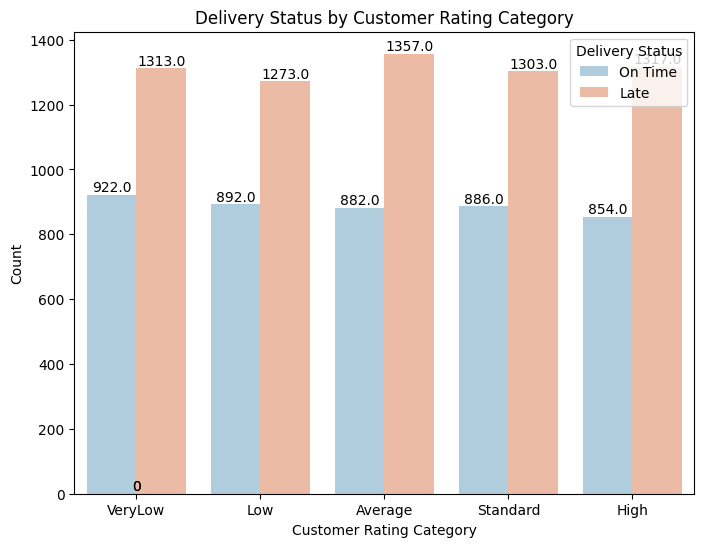

In [6]:
#ploting the graph
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Customer_rating_category', hue='Reached.on.Time_Y.N',  palette="RdBu_r")
plt.xlabel('Customer Rating Category')
plt.ylabel('Count')
plt.title('Delivery Status by Customer Rating Category')
plt.legend(title='Delivery Status', labels=['On Time', 'Late'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', color='black')
plt.show()

### Feature 3 :Prior Purchases Category

the "Prior_purchases_category" feature categorizes prior purchases into Very Low, Low, Medium, and High, helping to identify whether customer engagement affects delivery status.

In [7]:
df['Prior_purchases_category'] = pd.cut(df['Prior_purchases'], bins=[-1, 2, 5, 10, np.inf], labels=['Very Low', 'Low', 'Medium', 'High'])

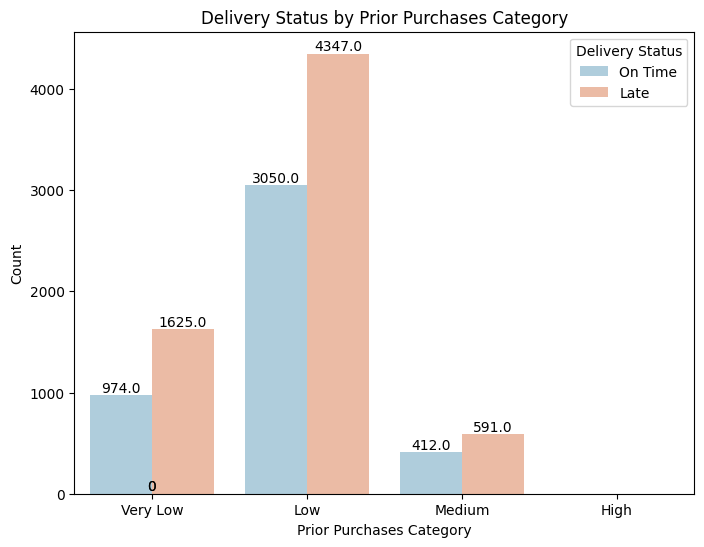

In [8]:
#ploting the graph
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Prior_purchases_category', hue='Reached.on.Time_Y.N',  palette="RdBu_r")
plt.xlabel('Prior Purchases Category')
plt.ylabel('Count')
plt.title('Delivery Status by Prior Purchases Category')
plt.legend(title='Delivery Status', labels=['On Time', 'Late'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', color='black')
plt.show()

### Feature 4 : Product Importance Category

The "Product_importance_category" feature retains the original product importance categories for analysis and visualization purposes.

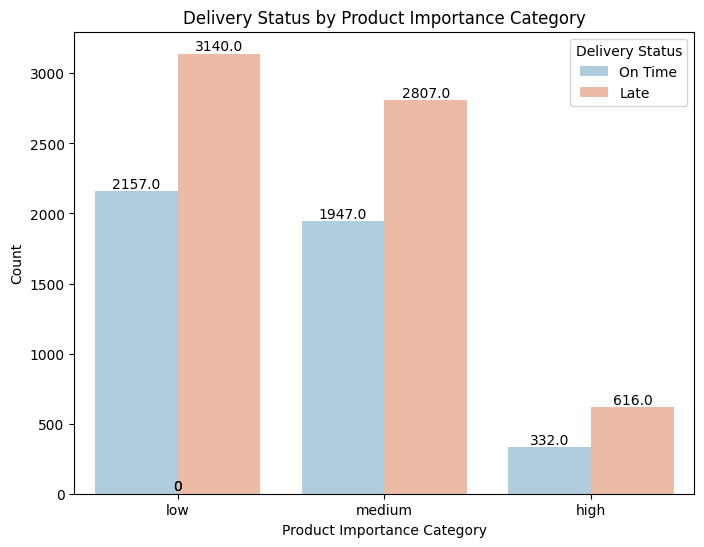

In [9]:
#ploting the graph
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Product_importance', hue='Reached.on.Time_Y.N', palette="RdBu_r")
plt.xlabel('Product Importance Category')
plt.ylabel('Count')
plt.title('Delivery Status by Product Importance Category')
plt.legend(title='Delivery Status', labels=['On Time', 'Late'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', color='black')
plt.show()

### Feature 5 :Gender Encoding

The "Gender_encoded" feature encodes gender into numerical values (0 for Female, 1 for Male), facilitating inclusion in machine learning models.

In [10]:
df['Gender_encoded'] = df['Gender'].map({'F': 0, 'M': 1})

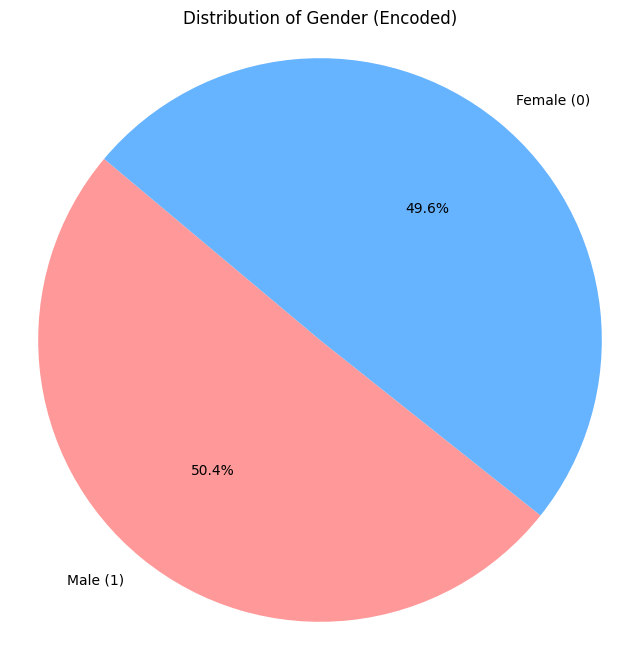

In [11]:
gender_counts = df['Gender_encoded'].value_counts()
labels = ['Male (1)', 'Female (0)']
counts = gender_counts.values

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999', '#66b3ff'])
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title('Distribution of Gender (Encoded)')
plt.show()

### Feature 6 : Interaction_CustomerRating_Discount

This feature represents the interaction between customer rating and the discount offered. It helps in understanding how the discount offered to customers correlates with their ratings.

In [12]:
df['Interaction_CustomerRating_Discount'] = df['Customer_rating'] * df['Discount_offered']

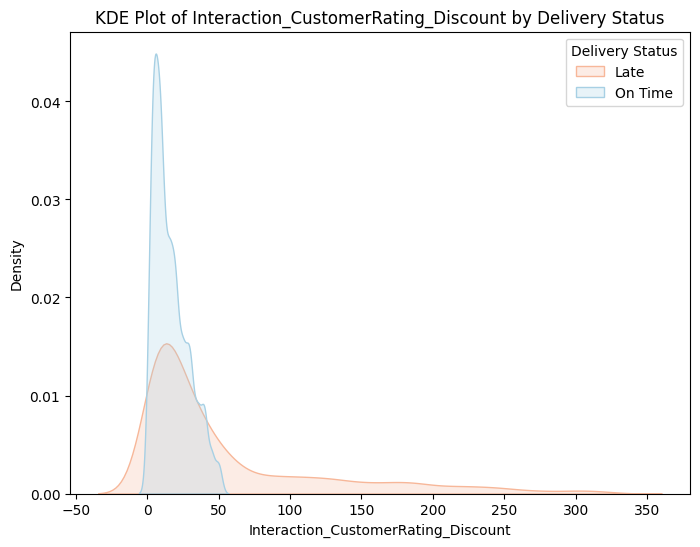

In [13]:
#plotting the graph
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='Interaction_CustomerRating_Discount', hue='Reached.on.Time_Y.N', fill=True, common_norm=False, palette="RdBu_r")
plt.xlabel('Interaction_CustomerRating_Discount')
plt.ylabel('Density')
plt.title('KDE Plot of Interaction_CustomerRating_Discount by Delivery Status')
plt.legend(title='Delivery Status', labels=['Late', 'On Time'])
plt.show()

### Feature 7 : Interaction_CustomerCalls_Rating

This feature represents the interaction between customer care calls and customer rating. It helps analyze how the number of customer care calls and customer ratings together impact delivery status.

In [14]:
df['Interaction_CustomerCalls_Rating'] = df['Customer_care_calls'] * df['Customer_rating']

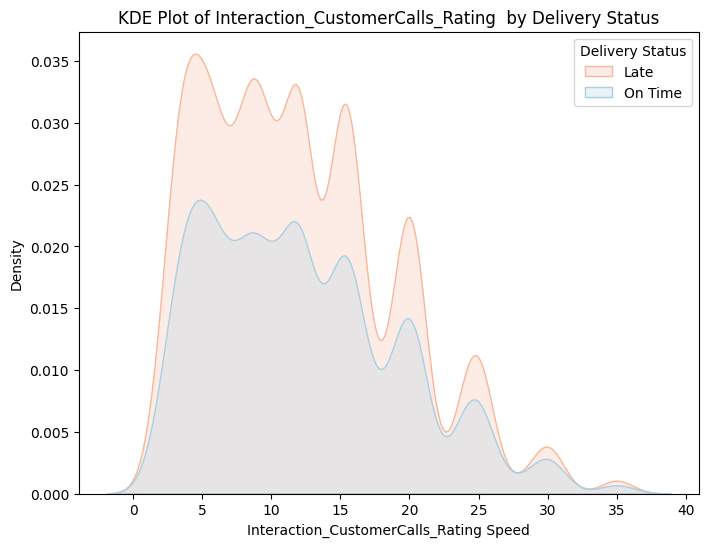

In [15]:
#plotting the graph
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='Interaction_CustomerCalls_Rating', hue='Reached.on.Time_Y.N', fill=True, palette="RdBu_r")
plt.xlabel('Interaction_CustomerCalls_Rating Speed')
plt.ylabel('Density')
plt.title('KDE Plot of Interaction_CustomerCalls_Rating  by Delivery Status')
plt.legend(title='Delivery Status', labels=['Late', 'On Time'])
plt.show()

### Feature 8 : Shipping Speed

the "Shipping_speed" feature represents the speed of shipment delivery based on the weight of the product and the number of customer care calls. It provides insights into how shipping speed affects delivery status.

In [16]:
df['Shipping_speed'] = df['Weight_in_gms'] / df['Customer_care_calls']

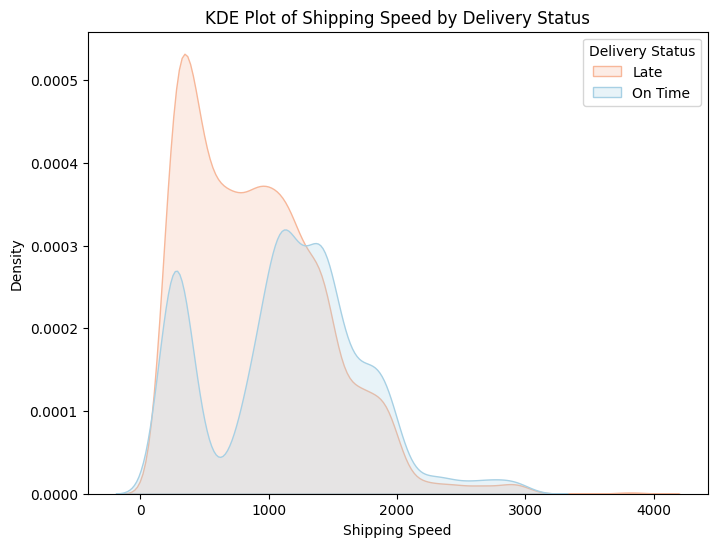

In [17]:
#plotting the graph
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='Shipping_speed', hue='Reached.on.Time_Y.N', fill=True,  palette="RdBu_r")
plt.xlabel('Shipping Speed')
plt.ylabel('Density')
plt.title('KDE Plot of Shipping Speed by Delivery Status')
plt.legend(title='Delivery Status', labels=['Late', 'On Time'])
plt.show()

### Feature 9 : Total Interactions

Total_interactions" feature represents the total number of interactions a customer has, including customer care calls and prior purchases. It helps identify whether more interactions lead to better delivery status.

In [18]:
df['Total_interactions'] = df['Customer_care_calls'] + df['Prior_purchases']

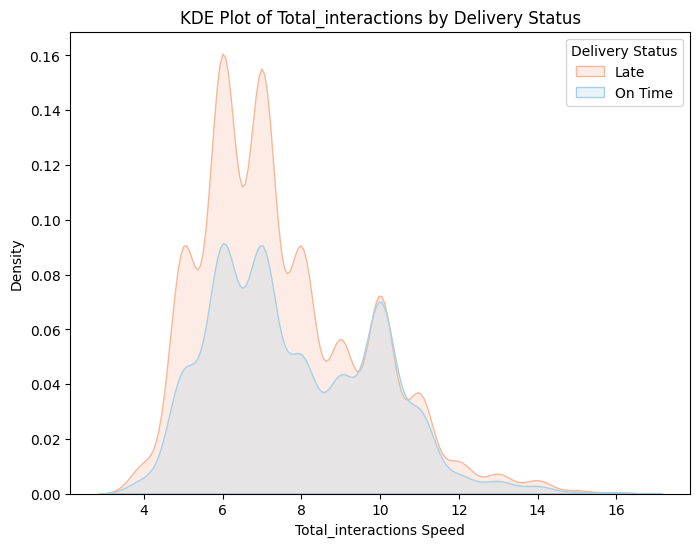

In [19]:
#plotting the graph
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='Total_interactions', hue='Reached.on.Time_Y.N', fill=True,  palette="RdBu_r")
plt.xlabel('Total_interactions Speed')
plt.ylabel('Density')
plt.title('KDE Plot of Total_interactions by Delivery Status')
plt.legend(title='Delivery Status', labels=['Late', 'On Time'])
plt.show()


### Feature 10 : Customer Care Calls vs. Expected Delivery Time

This feature calculates the difference between customer care calls made and the expected delivery time based on the mode of shipment. It helps analyze if there is any correlation between customer care calls and the expected delivery time.

In [20]:
expected_delivery_time = {'Ship': 4, 'Flight': 2, 'Road': 6}  # Assuming days
df['Expected_delivery_time'] = df['Mode_of_Shipment'].map(expected_delivery_time)
df['CustomerCare_vs_ExpectedTime'] = df['Customer_care_calls'] - df['Expected_delivery_time']

/var/folders/wj/_0sxv10d2yv0s5t24sjf71680000gn/T/ipykernel_46213/2691625014.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='Mode_of_Shipment', y='Customer_care_calls',  palette="PuBuGn")


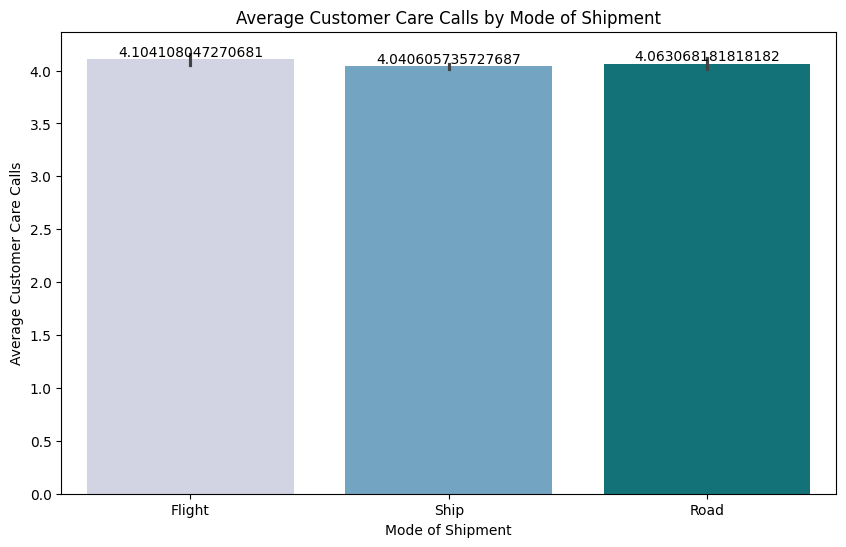

/var/folders/wj/_0sxv10d2yv0s5t24sjf71680000gn/T/ipykernel_46213/2691625014.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='Mode_of_Shipment', y='Expected_delivery_time',  palette="PuBuGn")


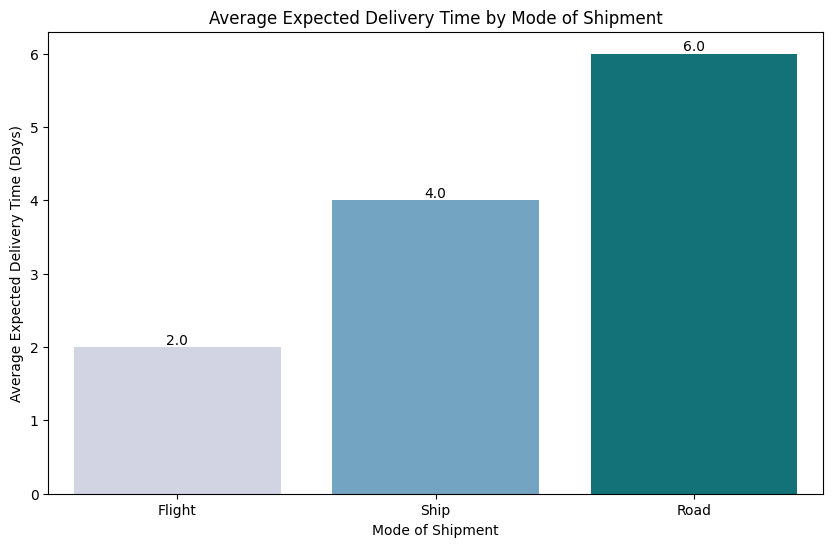

In [21]:
#plotting the graph
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='Mode_of_Shipment', y='Customer_care_calls',  palette="PuBuGn")
plt.xlabel('Mode of Shipment')
plt.ylabel('Average Customer Care Calls')
plt.title('Average Customer Care Calls by Mode of Shipment')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', color='black')
plt.show()

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='Mode_of_Shipment', y='Expected_delivery_time',  palette="PuBuGn")
plt.xlabel('Mode of Shipment')
plt.ylabel('Average Expected Delivery Time (Days)')
plt.title('Average Expected Delivery Time by Mode of Shipment')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', color='black')
plt.show()

### Feature 11 : Product Importance vs. Delivery Time

this feature calculates the average delivery performance (on-time delivery rate) for each product importance category. It helps in understanding how different product importance levels affect delivery time.

In [22]:
product_importance_avg_delivery = df.groupby('Product_importance')['Reached.on.Time_Y.N'].mean().reset_index()
product_importance_avg_delivery.columns = ['Product_importance', 'ProductImportance_avg_delivery']
df = df.merge(product_importance_avg_delivery, on='Product_importance', how='left')

/var/folders/wj/_0sxv10d2yv0s5t24sjf71680000gn/T/ipykernel_46213/1925431701.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='Product_importance', y='ProductImportance_avg_delivery', palette="PuBuGn")


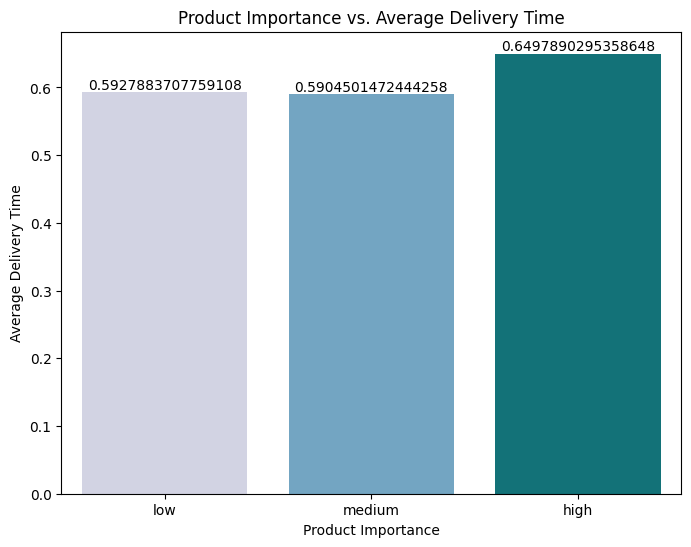

In [23]:
#plotting the graph
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df, x='Product_importance', y='ProductImportance_avg_delivery', palette="PuBuGn")
plt.xlabel('Product Importance')
plt.ylabel('Average Delivery Time')
plt.title('Product Importance vs. Average Delivery Time')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', color='black')
plt.show()

### Feature 12 : Shipping Mode vs. Delivery Time

This feature calculates the average delivery performance (on-time delivery rate) for each shipping mode. It helps in understanding how different shipping modes affect delivery time.

In [24]:
shipping_mode_avg_delivery = df.groupby('Mode_of_Shipment')['Reached.on.Time_Y.N'].mean().reset_index()
shipping_mode_avg_delivery.columns = ['Mode_of_Shipment', 'ShippingMode_avg_delivery']
df = df.merge(shipping_mode_avg_delivery, on='Mode_of_Shipment', how='left')

/var/folders/wj/_0sxv10d2yv0s5t24sjf71680000gn/T/ipykernel_46213/2273228974.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='Mode_of_Shipment', y='ShippingMode_avg_delivery', palette="PuBuGn")


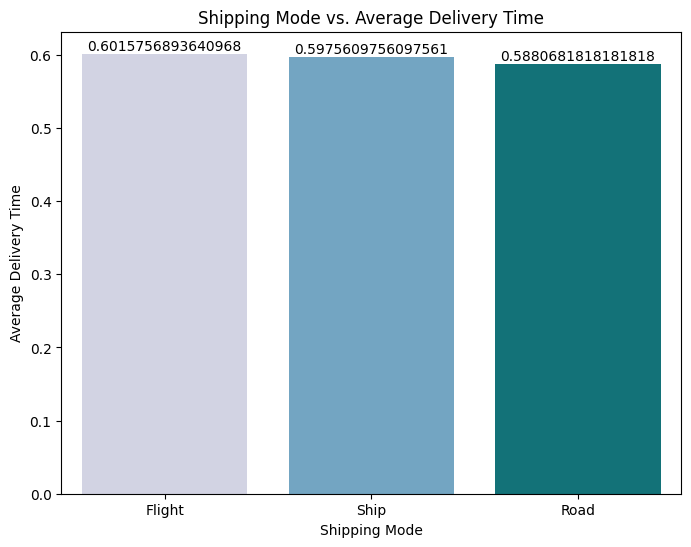

In [25]:
#plotting the graph
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df, x='Mode_of_Shipment', y='ShippingMode_avg_delivery', palette="PuBuGn")
plt.xlabel('Shipping Mode')
plt.ylabel('Average Delivery Time')
plt.title('Shipping Mode vs. Average Delivery Time')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', color='black')
plt.show()

### Feature 13 : Interaction_Weight_Discount

This feature represents the interaction between the weight of the product and the discount offered. It helps in understanding how the combination of weight and discount affects the target variable (delivery time).

In [26]:
df['Interaction_Weight_Discount'] = df['Weight_in_gms'] * df['Discount_offered']

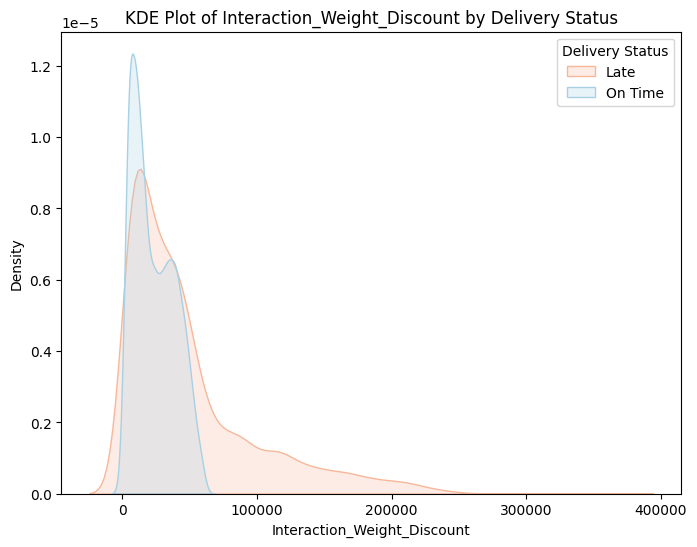

In [27]:
#plotting the graph
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='Interaction_Weight_Discount', hue='Reached.on.Time_Y.N', fill=True,  palette="RdBu_r")
plt.xlabel('Interaction_Weight_Discount')
plt.ylabel('Density')
plt.title('KDE Plot of Interaction_Weight_Discount by Delivery Status')
plt.legend(title='Delivery Status', labels=['Late', 'On Time'])
plt.show()


### Feature 14 : High_product_importance_and_high_rating

This feature represents the interaction between customer rating and the delivery time (on-time or late). It helps in understanding how customer ratings impact delivery status.

In [28]:
df['Customer_rating_and_delivery_time'] = df['Customer_rating'] * df['Reached.on.Time_Y.N']
df['Product_importance_and_delivery_time'] = df['Product_importance'] * df['Reached.on.Time_Y.N']
df['High_product_importance_and_high_rating'] = ((df['Product_importance'] == 'high') & (df['Customer_rating'] == 5)).astype(int)

/var/folders/wj/_0sxv10d2yv0s5t24sjf71680000gn/T/ipykernel_46213/1387723677.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Not High Importance', 'High Importance with Customer Rating 5'])


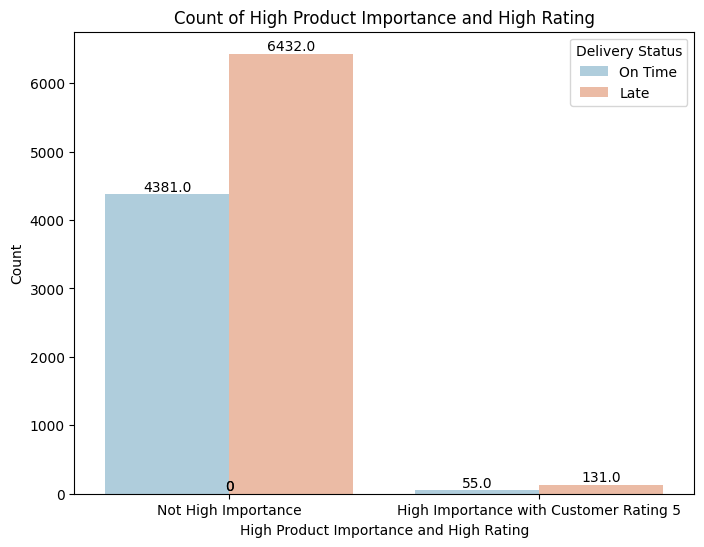

In [29]:
#plotting the graph
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='High_product_importance_and_high_rating', hue='Reached.on.Time_Y.N', palette="RdBu_r")

ax.set_xticklabels(['Not High Importance', 'High Importance with Customer Rating 5'])

plt.xlabel('High Product Importance and High Rating')
plt.ylabel('Count')
plt.title('Count of High Product Importance and High Rating')
plt.legend(title='Delivery Status', labels=['On Time', 'Late'])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', color='black')

plt.show()

### Feature 15 : Weight Category

The "Weight_in_gms" feature represents the weight of the product in grams. To gain insights from this continuous numerical data, we have created a new categorical feature called "Weight_category." We divided the weights into three bins: "Light," "Medium," and "Heavy." Products with weights up to 2000 grams are classified as "Light," weights between 2000 and 4000 grams are classified as "Medium," and weights above 4000 grams are classified as "Heavy."

In [30]:
weight_bins = [0, 2000, 4000, float('inf')]
weight_labels = ['Light', 'Medium', 'Heavy']
df['Weight_category'] = pd.cut(df['Weight_in_gms'], bins=weight_bins, labels=weight_labels)

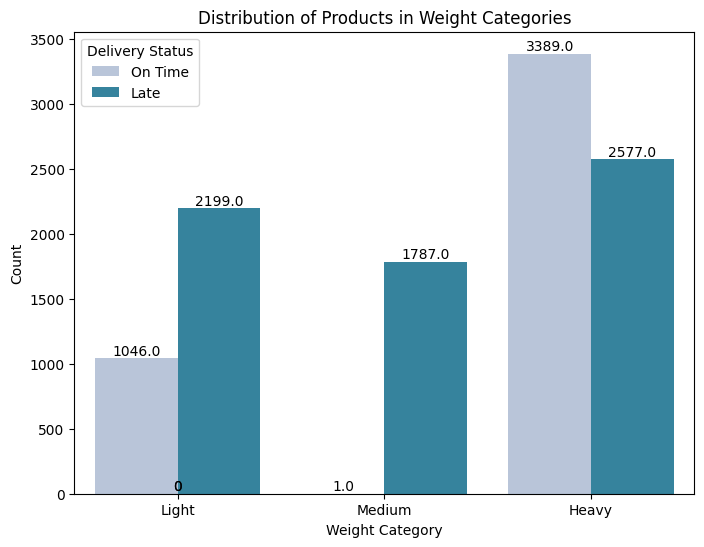

In [31]:
#plotting the graph
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Weight_category', hue='Reached.on.Time_Y.N', palette='PuBuGn')

plt.xlabel('Weight Category')
plt.ylabel('Count')
plt.title('Distribution of Products in Weight Categories')

# Add count annotations on top of each bar for each hue category (0 and 1) so that we can understand what kind of dist it is.
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', color='black')

ax.legend(title='Delivery Status', labels=['On Time', 'Late'], loc='upper right')
sns.move_legend(ax, "upper left")

plt.show()

### Feature 16 :Discount Category

The "Discount_offered" feature indicates the percentage of discount offered on the products. We have categorized the discounts into three bins: "Low," "Medium," and "High." Products with a discount percentage up to 10% are labeled as "Low," discounts between 10% and 30% are labeled as "Medium," and discounts above 30% are labeled as "High."

In [32]:
discount_bins = [0, 10, 30, 100]
discount_labels = ['Low', 'Medium', 'High']
df['Discount_category'] = pd.cut(df['Discount_offered'], bins=discount_bins, labels=discount_labels)

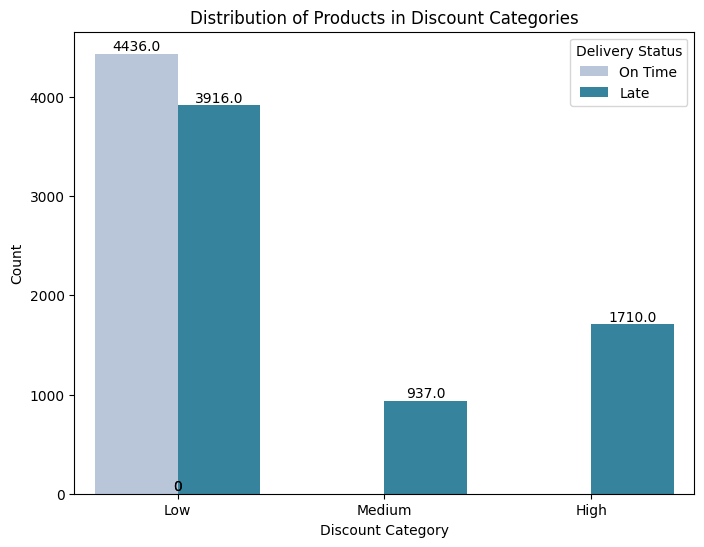

In [33]:
#plotting the graph
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Discount_category',  hue='Reached.on.Time_Y.N', palette='PuBuGn')
plt.xlabel('Discount Category')
plt.ylabel('Count')
plt.title('Distribution of Products in Discount Categories')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', color='black')
ax.legend(title='Delivery Status', labels=['On Time', 'Late'], loc='upper right')
sns.move_legend(ax, "upper right")
plt.show()

### Feature 17 :Product Value

The "Product_Value" feature is a newly created feature that represents the value of each product, calculated by multiplying the "Cost_of_the_Product" with the "Weight_in_gms." This feature provides insights into the value of each product based on its weight and cost.

In [34]:
df['Product_Value'] = df['Cost_of_the_Product'] * df['Weight_in_gms']

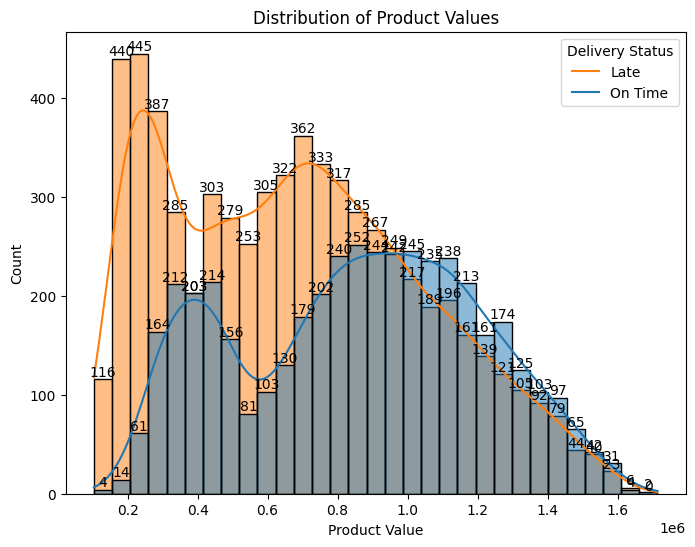

In [35]:
#plotting the graph
plt.figure(figsize=(8, 6))
ax=sns.histplot(data=df, x='Product_Value', hue='Reached.on.Time_Y.N',   kde=True)
plt.xlabel('Product Value')
plt.ylabel('Count')
plt.title('Distribution of Product Values')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', color='black')

ax.legend(title='Delivery Status', labels=['Late', 'On Time'], loc='upper right')
sns.move_legend(ax, "upper right")
plt.show()

### Feature 18 : Customer Loyalty

The "Prior_purchases" feature represents the number of prior purchases made by each customer. We have categorized the number of prior purchases into three bins: "New," "Regular," and "Frequent." Customers with 0 to 2 prior purchases are labeled as "New," customers with 2 to 5 prior purchases are labeled as "Regular," and customers with more than 5 prior purchases are labeled as "Frequent."

In [36]:
customer_loyalty_bins = [0, 2, 5, np.inf]
customer_loyalty_labels = ['New', 'Regular', 'Frequent']
df['Customer_Loyalty'] = pd.cut(df['Prior_purchases'], bins=customer_loyalty_bins, labels=customer_loyalty_labels)

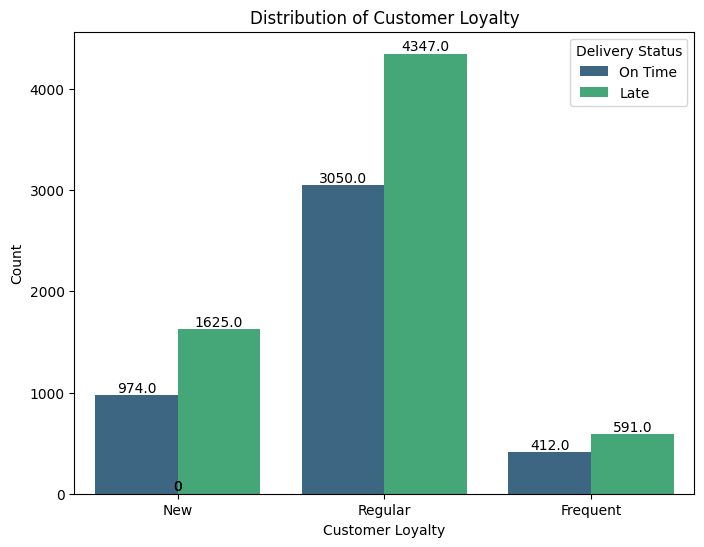

In [37]:
#plotting the graph
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Customer_Loyalty', palette='viridis',  hue='Reached.on.Time_Y.N' )
plt.xlabel('Customer Loyalty')
plt.ylabel('Count')
plt.title('Distribution of Customer Loyalty')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', color='black')

ax.legend(title='Delivery Status', labels=['On Time', 'Late'], loc='upper right')
sns.move_legend(ax, "upper right")
plt.show()


The "Customer_Satisfaction_Score" feature is a newly created feature that represents the average score of each customer's rating and delivery time. The score ranges from 0 to 3, with higher values indicating higher customer satisfaction.

### Feature 19 :Customer Satisfaction Score

In [38]:
df['Customer_Satisfaction_Score'] = (df['Customer_rating'] + df['Reached.on.Time_Y.N']) / 2

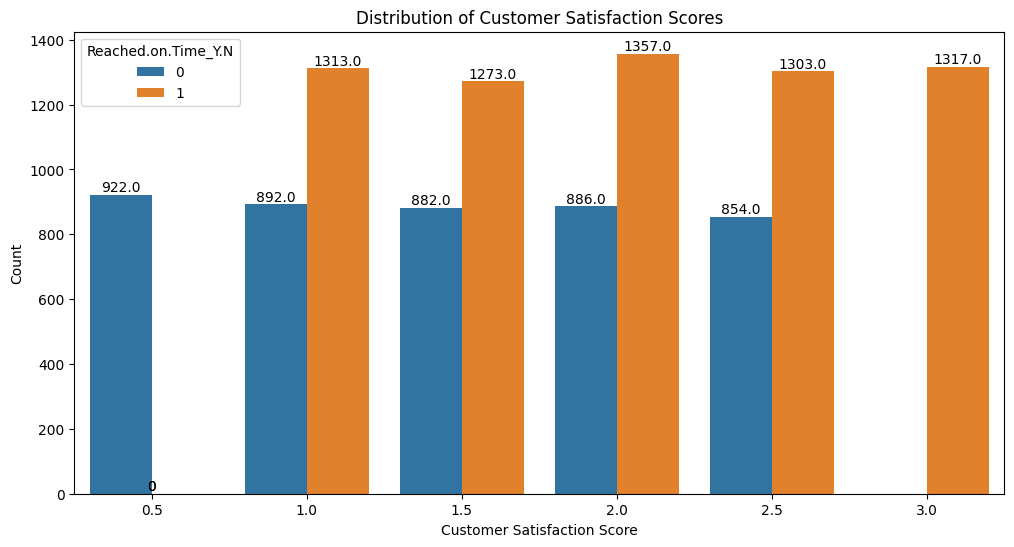

In [39]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x='Customer_Satisfaction_Score', y=df.index, estimator=len, hue='Reached.on.Time_Y.N')
plt.xlabel('Customer Satisfaction Score')
plt.ylabel('Count')
plt.title('Distribution of Customer Satisfaction Scores')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', color='black')
# ax.legend(title='Delivery Status', labels=['On Time', 'Late'], loc='upper right')
sns.move_legend(ax, "upper left")
plt.show()

### Feature 20 :Delivery Time per Weight

The "Delivery_Time_per_Weight" feature calculates the delivery time per weight of the product by dividing the "Weight_in_gms" by the "Expected_delivery_time." This feature provides insights into how the delivery time is affected by the weight of the products.

In [40]:
df['Delivery_Time_per_Weight'] = df['Weight_in_gms'] / df['Expected_delivery_time']

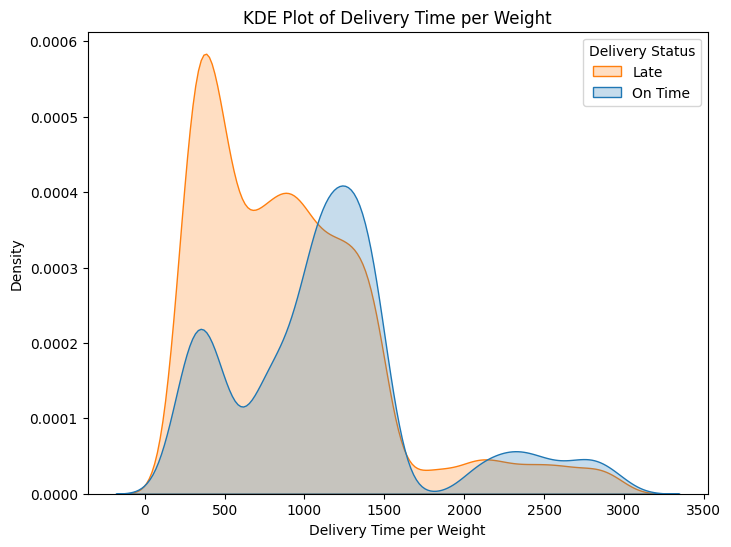

In [41]:
#plotting the graph
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='Delivery_Time_per_Weight', fill=True, hue='Reached.on.Time_Y.N')
plt.xlabel('Delivery Time per Weight')
plt.ylabel('Density')
plt.title('KDE Plot of Delivery Time per Weight')
plt.legend(title='Delivery Status', labels=['Late', 'On Time'], loc='upper right')
plt.show()

In [42]:
#dataframe with all features.
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,...,Interaction_Weight_Discount,Customer_rating_and_delivery_time,Product_importance_and_delivery_time,High_product_importance_and_high_rating,Weight_category,Discount_category,Product_Value,Customer_Loyalty,Customer_Satisfaction_Score,Delivery_Time_per_Weight
0,1,D,Flight,4,2,177,3,low,F,44,...,54252,2,low,0,Light,High,218241,Regular,1.5,616.50
1,2,F,Flight,4,5,216,2,low,M,59,...,182192,5,low,0,Medium,High,667008,New,3.0,1544.00
2,3,A,Flight,2,2,183,4,low,M,48,...,161952,2,low,0,Medium,High,617442,Regular,1.5,1687.00
3,4,B,Flight,3,3,176,4,medium,M,10,...,11770,3,medium,0,Light,Low,207152,Regular,2.0,588.50
4,5,C,Flight,2,2,184,3,medium,F,46,...,114264,2,medium,0,Medium,High,457056,Regular,1.5,1242.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,...,1538,1,medium,0,Light,Low,387576,Regular,1.0,384.50
10995,10996,B,Ship,4,1,232,5,medium,F,6,...,7482,0,,0,Light,Low,289304,Regular,0.5,311.75
10996,10997,C,Ship,5,4,242,5,low,F,4,...,4620,0,,0,Light,Low,279510,Regular,2.0,288.75
10997,10998,F,Ship,5,2,223,6,medium,M,2,...,2420,0,,0,Light,Low,269830,Frequent,1.0,302.50


In [43]:
output_csv_path = os.path.join(dataset_dir, 'stride_features.csv')
df.to_csv(output_csv_path, index=False)

# Print a message to confirm the successful saving of the CSV file
print(f"DataFrame has been saved to {output_csv_path} with all added feature columns and data.")

DataFrame has been saved to /Users/ashleshkhajbage/Documents/GitHub/Stride-Logistics-Analytics/source_code/Phase2/../../Dataset/stride_features.csv with all added feature columns and data.


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 34 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   ID                                       10999 non-null  int64   
 1   Warehouse_block                          10999 non-null  object  
 2   Mode_of_Shipment                         10999 non-null  object  
 3   Customer_care_calls                      10999 non-null  int64   
 4   Customer_rating                          10999 non-null  int64   
 5   Cost_of_the_Product                      10999 non-null  int64   
 6   Prior_purchases                          10999 non-null  int64   
 7   Product_importance                       10999 non-null  object  
 8   Gender                                   10999 non-null  object  
 9   Discount_offered                         10999 non-null  int64   
 10  Weight_in_gms                     